# Librerias

In [1]:
library(bnlearn)
library(Rgraphviz)

Loading required package: graph

Loading required package: BiocGenerics

Loading required package: parallel



Error in setMethod("path", cl, where = topenv(parent.frame()), function(object,  : 
  the environment 'base' is locked; cannot assign methods for function 'path'



Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:bnlearn':

    path, score


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min




Error in setMethod("nodes", cl, where = topenv(parent.frame()), function(object) .nodes(object)) : 
  the environment 'base' is locked; cannot assign methods for function 'nodes'



Attaching package: 'graph'


The following objects are masked from 'package:bnlearn':

    degree, nodes, nodes<-


Loading required package: grid



# Datos

In [2]:
# tabla = read.csv("data/ARIA_cleaned/PlanRT.csv", row.names=1)
tabla = read.csv("data/ARIA_cleaned/Sch_categ.csv", row.names=1)

cols = names(tabla)
length(cols)

tabla[cols] <- lapply(tabla[cols], factor)
tabla = tabla[cols]

dim(tabla)
head(tabla)

[1] 60

[1] 19844    60

,ActivityCategoryCode,Duration,NotificationPriorTimeFlag_x,NoEditFlag_x,NotificationPriorTimeFlag_y,ResourceGroupSer,Description,PatientStatus,Priority,AssignableFlag,...,TStage,ObjectStatus_y_4,TumorSize,NStage,DiagnosisCode_sec,SummaryStage,ClinicalStatus,ObjectStatus_sec,DiagnosisCode,HistologyCode_sec
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
54,Treatment,10,0,1,0,12.0,isNaN,Paciente Ingresado,Medium,1,...,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,ACTIVE,isNaN,isNaN,isNaN
55,Treatment,10,0,1,0,12.0,isNaN,Paciente Ingresado,Medium,1,...,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,ACTIVE,isNaN,isNaN,isNaN
56,Treatment,10,0,1,0,12.0,isNaN,Paciente Ingresado,Medium,1,...,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,ACTIVE,isNaN,isNaN,isNaN
57,Treatment,10,0,1,0,12.0,isNaN,Paciente Ingresado,Medium,1,...,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,ACTIVE,isNaN,isNaN,isNaN
62,Treatment,10,0,1,0,12.0,isNaN,Paciente Ingresado,Medium,1,...,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,ACTIVE,isNaN,isNaN,isNaN
663,Treatment,30,0,0,0,isNaN,isNaN,Paciente Ingresado,Medium,1,...,3a,Active,isNaN,1,isNaN,IIB,ACTIVE,isNaN,C61,isNaN


# Aprendizaje de estructura

In [3]:
hcdag <- hc(tabla)
tabudag <- tabu(tabla)

In [4]:
bnlearn::score(hcdag, data = tabla, type = "bic")
bnlearn::score(tabudag, data = tabla, type = "bic")

arc.strength(hcdag, data = tabla, criterion = "x2") # x2, aic...
arc.strength(hcdag, data = tabla, criterion = "bic") # x2, aic... iamzç

# print(hcdag)
# plot(hcdag)
# print(tabudag)

[1] -420825.6

[1] -420825.6

,from,to,strength
,<chr>,<chr>,<dbl>
1,SummaryStage,DiagnosisCode,0
2,DiagnosisCode,TreatmentIntentType,0
3,DiagnosisCode,TStage,0
4,NStage,SummaryStage,0
5,SummaryStage,MStage,0
6,TreatmentIntentType,NoFractions,0
7,ResourceGroupSer,ActivityCode,0
8,EquipmentSer,InterfaceStamp,0
9,NoEditFlag_x,ResourceGroupSer,0


,from,to,strength
,<chr>,<chr>,<dbl>
1,SummaryStage,DiagnosisCode,-16385.8812
2,DiagnosisCode,TreatmentIntentType,-16063.6890
3,DiagnosisCode,TStage,-15866.5139
4,NStage,SummaryStage,-13335.9271
5,SummaryStage,MStage,-12732.7881
6,TreatmentIntentType,NoFractions,-11908.9776
7,ResourceGroupSer,ActivityCode,-11734.4625
8,EquipmentSer,InterfaceStamp,-10339.5470
9,NoEditFlag_x,ResourceGroupSer,-11424.7106


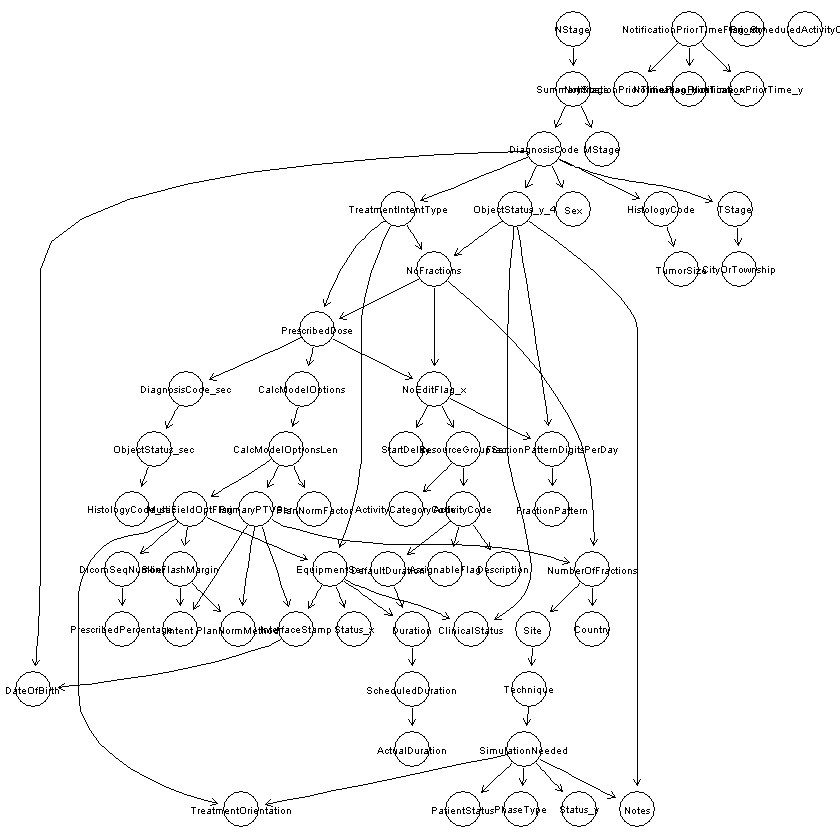

In [5]:
# graphviz.plot(hcdag)
# graphviz.plot(tabudag)

g <- Rgraphviz::layoutGraph(bnlearn::as.graphNEL(hcdag))
graph::nodeRenderInfo(g) <- list(fontsize=60)
Rgraphviz::renderGraph(g)

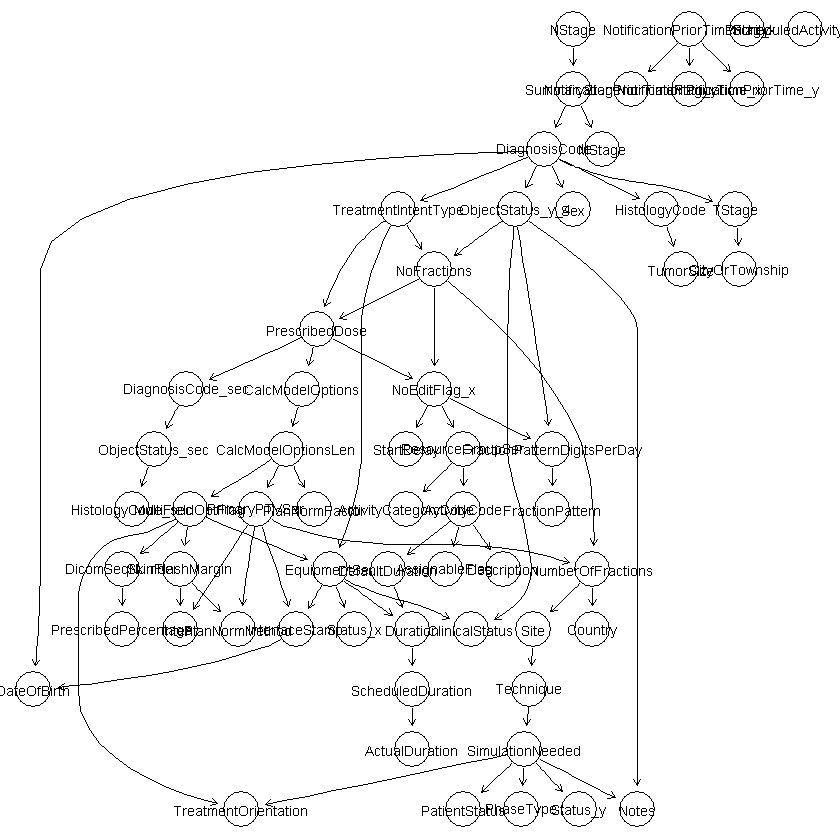

In [6]:
g <- Rgraphviz::layoutGraph(bnlearn::as.graphNEL(tabudag))
graph::nodeRenderInfo(g) <- list(fontsize=80)
Rgraphviz::renderGraph(g)

In [7]:
vstructs(hcdag)

X,Z,Y
DefaultDuration,Duration,EquipmentSer
InterfaceStamp,DateOfBirth,DiagnosisCode
MultiFieldOptFlag,EquipmentSer,TreatmentIntentType
SkinFlashMargin,PlanNormMethod,PrimaryPTVSer
PrimaryPTVSer,NumberOfFractions,NoFractions
SimulationNeeded,TreatmentOrientation,MultiFieldOptFlag
NoEditFlag_x,FractionPatternDigitsPerDay,ObjectStatus_y_4
TreatmentIntentType,NoFractions,ObjectStatus_y_4
SkinFlashMargin,Intent,PrimaryPTVSer
SimulationNeeded,Notes,ObjectStatus_y_4


# Aprendizaje de parámetros

In [8]:
bn.bayes <- bn.fit(hcdag, data = tabla, method = "bayes")
nparams(bn.bayes)
# bn.bayes$PrescribedPercentage
bn.bayes$Status_y

[1] 6399


  Parameters of node Status_y (multinomial distribution)

Conditional probability table:
 
          SimulationNeeded
Status_y            1.0        isNaN
  Approved 9.998793e-01 1.406509e-05
  isNaN    1.207438e-04 9.999859e-01